## AI Programming with Python Nanodegree: Image Classifier Project
  - Do not make changes to the first 2 code cells, they are being used for setting up the `flowers` dataset and `cat_to_name.json`. Start writing code from third code cell onwards.
  - To use this notebook: `File > Save a copy in Drive`
  

### Code Explanation:

- **Setting Up Flower Dataset:**
  - `data_dir = './flowers'`: Defines the directory path for the flower dataset.
  - `FLOWERS_DIR = Path(data_dir)`: Uses `Path` from `pathlib` for handling PosixPath.

- **Downloading and Extracting Dataset:**
  - `if not FLOWERS_DIR.is_dir()`: Checks if the dataset directory exists.
    - `FLOWERS_DIR.mkdir(parents=True, exist_ok=True)`: Creates the directory if not present.
  - `TARBALL = FLOWERS_DIR / "flower_data.tar.gz"`: Defines the tarball path.
  - Downloads and extracts the dataset if not already present:
    - `request = requests.get(...)`: Downloads the 'flower_data.tar.gz' file.
    - `with open(TARBALL, "wb") as file_ref`: Writes the downloaded content to the tarball.
    - `with tarfile.open(TARBALL, "r") as tar_ref`: Extracts the tarball contents to the dataset directory.

- **Cleaning Up:**
  - `os.remove(TARBALL)`: Deletes the downloaded tarball to save space.

- **Status Messages:**
  - Prints informative messages about the directory creation, download, extraction, and cleanup.


In [9]:
# imports
import os
import requests
from pathlib import Path
import tarfile

# defining dataset directory
data_dir = './flowers'

# using pathlib.Path for handling PosixPath
FLOWERS_DIR = Path(data_dir)

# downloading and setting up data if not already present
if not FLOWERS_DIR.is_dir():
    # creating directory
    FLOWERS_DIR.mkdir(parents=True, exist_ok=True)
    print(f"[INFO] Directory created: ./{FLOWERS_DIR}")

    print() # for readability

    # tarball path
    TARBALL = FLOWERS_DIR / "flower_data.tar.gz"

    # downloading and writing the tarball to './flowers' directory
    print(f"[INFO] Downloading the file 'flower_data.tar.gz' to ./{FLOWERS_DIR}")
    request = requests.get('https://s3.amazonaws.com/content.udacity-data.com/nd089/flower_data.tar.gz')
    with open(TARBALL, "wb") as file_ref:
        file_ref.write(request.content)
        print(f"[INFO] 'flower_data.tar.gz' saved to ./{FLOWERS_DIR}")

    print() # for readability

    # extracting the downloaded tarball
    print(f"[INFO] Extracting the downloaded tarball to ./{FLOWERS_DIR}")
    with tarfile.open(TARBALL, "r") as tar_ref:
        tar_ref.extractall(FLOWERS_DIR)
        print(f"[INFO] 'flower_data.tar.gz' extracted successfully to ./{FLOWERS_DIR}")

    print() # for readability

    # using os.remove to delete the downloaded tarball
    print("[INFO] Deleting the tarball to save space.")
    os.remove(TARBALL)
else:
    print(f"[INFO] Dataset already setup at ./{FLOWERS_DIR}")

[INFO] Directory created: ./flowers

[INFO] Downloading the file 'flower_data.tar.gz' to ./flowers
[INFO] 'flower_data.tar.gz' saved to ./flowers

[INFO] Extracting the downloaded tarball to ./flowers
[INFO] 'flower_data.tar.gz' extracted successfully to ./flowers

[INFO] Deleting the tarball to save space.


### Code Explanation:

- **Creating a JSON File for Flower Categories:**
  - `data`: Defines a dictionary containing numerical keys and corresponding flower names.
  - `with open('cat_to_name.json', 'w') as file`: Opens the file 'cat_to_name.json' for writing.
  - `json.dump(data, file)`: Writes the dictionary data to the JSON file.

- **Interpreting the Output:**
  - The code creates a JSON file named 'cat_to_name.json' that serves as a mapping between numerical keys and flower names. This mapping can be useful for associating numerical labels with human-readable names in machine learning tasks.


In [10]:
import json

data = {
    "21": "fire lily", "3": "canterbury bells", "45": "bolero deep blue", "1": "pink primrose", "34": "mexican aster",
    "27": "prince of wales feathers", "7": "moon orchid", "16": "globe-flower", "25": "grape hyacinth", "26": "corn poppy",
    "79": "toad lily", "39": "siam tulip", "24": "red ginger", "67": "spring crocus", "35": "alpine sea holly",
    "32": "garden phlox", "10": "globe thistle", "6": "tiger lily", "93": "ball moss", "33": "love in the mist",
    "9": "monkshood", "102": "blackberry lily", "14": "spear thistle", "19": "balloon flower", "100": "blanket flower",
    "13": "king protea", "49": "oxeye daisy", "15": "yellow iris", "61": "cautleya spicata", "31": "carnation",
    "64": "silverbush", "68": "bearded iris", "63": "black-eyed susan", "69": "windflower", "62": "japanese anemone",
    "20": "giant white arum lily", "38": "great masterwort", "4": "sweet pea", "86": "tree mallow",
    "101": "trumpet creeper", "42": "daffodil", "22": "pincushion flower", "2": "hard-leaved pocket orchid",
    "54": "sunflower", "66": "osteospermum", "70": "tree poppy", "85": "desert-rose", "99": "bromelia", "87": "magnolia",
    "5": "english marigold", "92": "bee balm", "28": "stemless gentian", "97": "mallow", "57": "gaura",
    "40": "lenten rose", "47": "marigold", "59": "orange dahlia", "48": "buttercup", "55": "pelargonium",
    "36": "ruby-lipped cattleya", "91": "hippeastrum", "29": "artichoke", "71": "gazania", "90": "canna lily",
    "18": "peruvian lily", "98": "mexican petunia", "8": "bird of paradise", "30": "sweet william",
    "17": "purple coneflower", "52": "wild pansy", "84": "columbine", "12": "colt's foot", "11": "snapdragon",
    "96": "camellia", "23": "fritillary", "50": "common dandelion", "44": "poinsettia", "53": "primula",
    "72": "azalea", "65": "californian poppy", "80": "anthurium", "76": "morning glory", "37": "cape flower",
    "56": "bishop of llandaff", "60": "pink-yellow dahlia", "82": "clematis", "58": "geranium", "75": "thorn apple",
    "41": "barbeton daisy", "95": "bougainvillea", "43": "sword lily", "83": "hibiscus", "78": "lotus lotus",
    "88": "cyclamen", "94": "foxglove", "81": "frangipani", "74": "rose", "89": "watercress", "73": "water lily",
    "46": "wallflower", "77": "passion flower", "51": "petunia"
}

with open('cat_to_name.json', 'w') as file:
    json.dump(data, file)

In [11]:
# Check torch version and CUDA status if GPU is enabled.
import torch
print(torch.__version__)
print(torch.cuda.is_available()) # Should return True when GPU is enabled.

2.4.1+cu121
True


In [12]:
#  All Imports here

import torch
import numpy as np
from torch import nn
from torch import optim
import torch.nn.functional as F

from torchvision import datasets, transforms, models

import json

from collections import OrderedDict

import time

from PIL import Image

import matplotlib.pyplot as plt
from collections import OrderedDict
print("Library imported successfully.")

Library imported successfully.


# Load Data

In [13]:
data_dir = 'flowers'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

In [14]:
# Define transforms for the training, validation, and testing sets
# Define transforms for the training, validation, and testing sets
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

valid_transforms = transforms.Compose([transforms.Resize(256),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

# Load the datasets with ImageFolder
train_data = datasets.ImageFolder(train_dir, transform=train_transforms)
test_data = datasets.ImageFolder(test_dir, transform=test_transforms)
valid_data = datasets.ImageFolder(valid_dir, transform=valid_transforms)

# Define the dataloaders
trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32)
validloader = torch.utils.data.DataLoader(valid_data, batch_size=32)

print("Data loaded successfully.")

Data loaded successfully.


In [15]:
# Load the mapping from category label to category name
with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)

print("Category to name mapping loaded successfully.")

Category to name mapping loaded successfully.


#Model Building

In [16]:
# Load a pre-trained network
model = models.vgg16_bn(pretrained=True)

# Freeze parameters so we don't backprop through them
for param in model.parameters():
    param.requires_grad = False

# Define a new, untrained feed-forward network as a classifier
classifier = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(25088, 4096)),
                          ('relu', nn.ReLU()),
                          ('dropout', nn.Dropout(0.2)),
                          ('fc2', nn.Linear(4096, 102)),
                          ('output', nn.LogSoftmax(dim=1))
                          ]))
model.classifier = classifier

print("Model built successfully.")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth
100%|██████████| 528M/528M [00:04<00:00, 131MB/s]


Model built successfully.


# Model Training

In [17]:
# Set the device to GPU or CPU

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.NLLLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

epochs = 5
steps = 0
print_every = len(trainloader)  # This ensures the summary is printed once per epoch

for epoch in range(epochs):
    running_loss = 0
    for inputs, labels in trainloader:
        steps += 1

        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        logps = model.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if steps % print_every == 0:
            valid_loss = 0
            accuracy = 0
            model.eval()
            with torch.no_grad():
                for inputs, labels in validloader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    logps = model.forward(inputs)
                    batch_loss = criterion(logps, labels)

                    valid_loss += batch_loss.item()

                    # Calculate accuracy
                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train loss: {running_loss/len(trainloader):.3f}.. "
                  f"Validation loss: {valid_loss/len(validloader):.3f}.. "
                  f"Validation accuracy: {accuracy/len(validloader) * 100:.2f}%")
            running_loss = 0
            model.train()

print(" Model Training complete.")


Epoch 1/5.. Train loss: 2.570.. Validation loss: 0.701.. Validation accuracy: 81.69%
Epoch 2/5.. Train loss: 0.893.. Validation loss: 0.387.. Validation accuracy: 89.54%
Epoch 3/5.. Train loss: 0.767.. Validation loss: 0.333.. Validation accuracy: 91.40%
Epoch 4/5.. Train loss: 0.647.. Validation loss: 0.317.. Validation accuracy: 91.93%
Epoch 5/5.. Train loss: 0.595.. Validation loss: 0.276.. Validation accuracy: 92.75%
 Model Training complete.


In [18]:
# Test the network
# Set the model to evaluation mode
model.eval()

# Initialize variables to track test loss and accuracy
test_loss = 0.0
accuracy = 0.0

# Disable gradient calculation for evaluation
with torch.no_grad():
    for inputs, labels in testloader:  # Loop over the test data
        # Move inputs and labels to the GPU if available
        inputs, labels = inputs.to('cuda'), labels.to('cuda')

        # Forward pass: Compute the model output (log probabilities)
        logps = model(inputs)

        # Compute the batch loss
        batch_loss = criterion(logps, labels)
        test_loss += batch_loss.item()

        # Calculate accuracy
        ps = torch.exp(logps)  # Convert log probabilities to probabilities
        top_p, top_class = ps.topk(1, dim=1)  # Get the class with the highest probability
        equals = top_class == labels.view(*top_class.shape)  # Check predictions
        accuracy += torch.mean(equals.type(torch.FloatTensor)).item()  # Accumulate accuracy

# Calculate average test loss and accuracy across all batches
avg_test_loss = test_loss / len(testloader)
avg_accuracy = accuracy / len(testloader)

# Print the results
print(f"Test Loss: {avg_test_loss:.3f}.. "
      f"Test Accuracy: {avg_accuracy:.3f}")


Test Loss: 0.341.. Test Accuracy: 0.900


In [19]:
# TODO: Save the checkpoint
# Attach class-to-index mapping to the model
# Save the checkpoint
# Assuming 'train_data' is the ImageFolder dataset used for training:
model.class_to_idx = train_data.class_to_idx
checkpoint = {
    'state_dict': model.state_dict(),
    'class_to_idx': model.class_to_idx
}

torch.save(checkpoint, 'checkpoint.pth')

In [20]:
# Load the checkpoint Write a function that loads a checkpoint and rebuilds the model
def load_checkpoint(filepath):
    # Load the checkpoint from the specified filepath
    checkpoint = torch.load(filepath)

    # Load a pre-trained VGG16 model
    model = models.vgg16(pretrained=True)

    # Freeze the feature extraction layers to avoid updating their weights
    for param in model.parameters():
        param.requires_grad = False

    # Redefine the classifier with custom layers
    model.classifier = nn.Sequential(OrderedDict([
        ('fc1', nn.Linear(25088, 4096)),
        ('relu', nn.ReLU()),
        ('dropout', nn.Dropout(0.5)),
        ('fc2', nn.Linear(4096, 102)),  # Assuming 102 output classes (e.g., for flower classification)
        ('output', nn.LogSoftmax(dim=1))  # LogSoftmax for multi-class classification
    ]))

    # Load the model state (weights) from the checkpoint
    model.load_state_dict(checkpoint['state_dict'])

    # Load class-to-index mapping from the checkpoint
    model.class_to_idx = checkpoint.get('class_to_idx', None)

    return model

In [21]:
def process_image(image_path):
    pil_image = Image.open(image_path)
    pil_image = pil_image.resize((256, 256))
    left = (pil_image.width - 224) / 2
    top = (pil_image.height - 224) / 2
    right = (pil_image.width + 224) / 2
    bottom = (pil_image.height + 224) / 2
    pil_image = pil_image.crop((left, top, right, bottom))
    np_image = np.array(pil_image) / 255
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    np_image = (np_image - mean) / std
    np_image = np_image.transpose((2, 0, 1))
    return torch.tensor(np_image).float()

def predict(image_path, model, topk=5):
    image = process_image(image_path)
    image = image.unsqueeze(0)
    model.eval()
    # Move the image to the same device as the model
    image = image.to(device)  # Add this line
    with torch.no_grad():
        outputs = model(image)
        ps = torch.nn.functional.softmax(outputs, dim=1)
        top_p, top_class = ps.topk(topk, dim=1)
        idx_to_class = {v: k for k, v in model.class_to_idx.items()}
        top_class = top_class.cpu().numpy()[0]
        top_class = [idx_to_class[i] for i in top_class]
    return top_p.cpu().numpy()[0], top_class


print("Inference function for classifications is ready.")

Inference function for classifications is ready.


In [22]:
def imshow(image, ax=None, title=None):

    if ax is None:
        fig, ax = plt.subplots()

    # Convert from torch tensor to numpy array and reverse channel order
    image = image.numpy().transpose((1, 2, 0))

    # Denormalize the image
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean

    # Clip image values to be within valid range
    image = np.clip(image, 0, 1)

    ax.imshow(image)
    if title:
        ax.set_title(title)
    ax.axis('off')  # Hide the axis for better presentation

    return ax

import seaborn as sns
import matplotlib.pyplot as plt

def plot_solution(image_path, model):
    """
    Displays an image along with the model's predicted probabilities and class names.

    Parameters:
    - image_path: Path to the image file to be processed and displayed.
    - model: Pre-trained model used for prediction.
    """
    # Set up the plot
    plt.figure(figsize=(6, 10))

    # Plot the image on the top
    ax = plt.subplot(2, 1, 1)
    img = process_image(image_path)  # Assuming process_image is defined elsewhere
    flower_class = image_path.split('/')[-2]  # Extract the class from the path
    title = cat_to_name.get(flower_class, 'Unknown Flower')  # Handle potential missing keys
    imshow(img, ax, title=title)  # Show image with title

    # Predict the top classes and probabilities
    probs, classes = predict(image_path, model)  # Assuming predict function is defined
    class_names = [cat_to_name.get(cls, 'Unknown Flower') for cls in classes]  # Map class indices to names

    # Plot the probabilities as a horizontal bar plot
    plt.subplot(2, 1, 2)
    sns.barplot(x=probs, y=class_names, color=sns.color_palette()[0])
    plt.xlabel('Probability')
    plt.title('Top Predicted Classes')

    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.show()

print("Prediction display function is ready.")

Prediction display function is ready.


Model is loaded on the device: cuda
Image processed successfully.
Predicted probabilities:  [9.9393904e-01 5.8918595e-03 5.5912638e-05 3.1914413e-05 2.8220289e-05]
Predicted classes:  ['1', '51', '65', '83', '19']


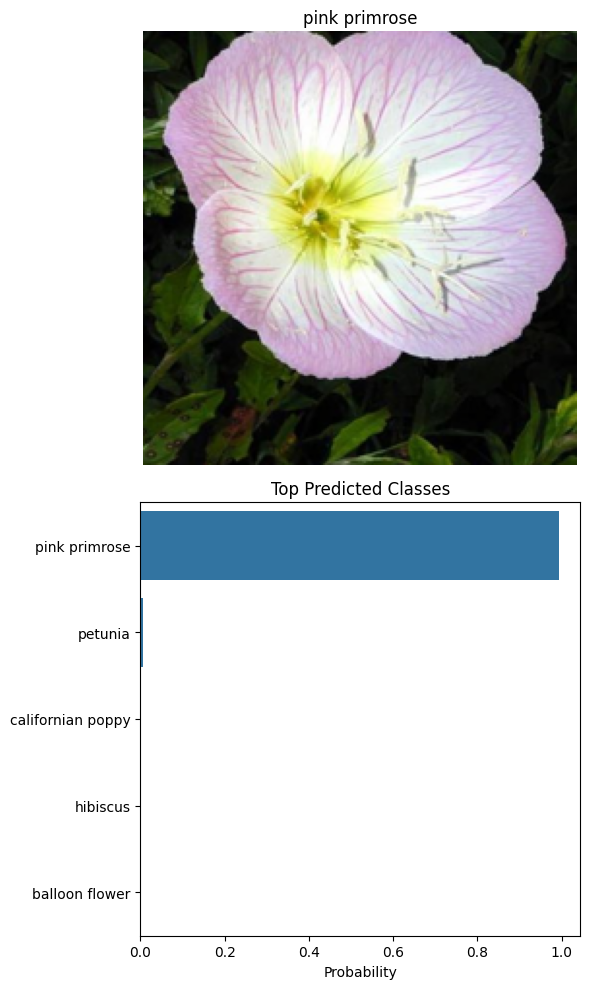

Prediction display completed successfully.


In [23]:
# Load the model and set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(f"Model is loaded on the device: {device}")

# Process the image and predict the top 5 classes
image_path = '/content/flowers/test/1/image_06743.jpg'

# Process the image
img = process_image(image_path)  # Assuming process_image is defined
print("Image processed successfully.")

# Get the top 5 probabilities and corresponding classes
probs, classes = predict(image_path, model, topk=5)  # Assuming predict accepts a topk parameter
print("Predicted probabilities: ", probs)
print("Predicted classes: ", classes)

# Display the results
plot_solution(image_path, model)  # plot_solution will now display the top 5 classes in a graph
print("Prediction display completed successfully.")